3. Valuing American Put Option

   is_call_val = False
    spot_price_val = 80.0
    strike_val = 80.0
    expiry_val = 0.5
    lognormal_val = True
    r_val = 0.05
    sigma_val = 0.25
    num_dt_val = 10
    num_paths_val = 200000
    num_laguerre_val = 3
    batch_size_val = 10000
    model_prob_draws_val = 10

In [10]:
from qfrm2.American import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.model_selection import train_test_split
%precision 3

'%.3f'

In [18]:
s = Stock(S0=40, vol=0.2)
o = American(ref=s, right='put', K=40, T=1, rf_r=0.06)

In [14]:
o_european=European(ref=s, right='put', K=40, T=2, rf_r=0.06)

In [25]:
(o.pxBS(), o.pxLT(nsteps=1000), o.pxMC(nsteps=100, npaths=100000, rng_seed=1, deg=5))

(2.325, 2.319, 2.267037219)

In [6]:
(o_european.pxBS(), o_european.pxLT(nsteps=1000), o_european.pxMC(nsteps=100, npaths=100000, rng_seed=1, deg=5))

(5.736, 5.737, 5.744941682)

European Price = 4.633
LSPI Price = 4.535
FQI Price = 4.534
Longstaff-Schwartz Price = 4.796
Grid Price = 4.792
European Price = 4.633

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

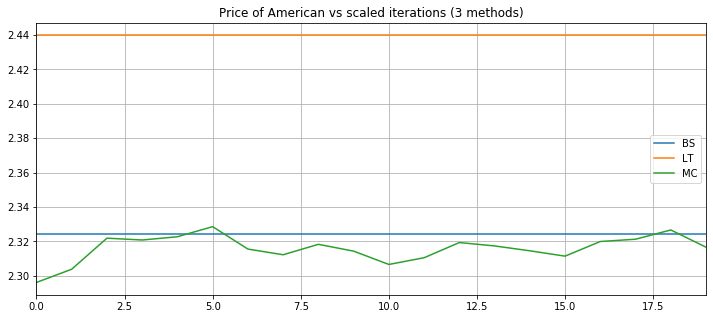

In [27]:
I = np.arange(10,210,10)
dBS = [o.pxBS() for i in I]
dLT = [o.pxLT(nsteps=i) for i in I]
dMC = [LSMC_inmoney(40,40,-1,0.06,0.2,1,1,5,100+i,1000*i) for i in I]
from pandas import DataFrame
d = DataFrame({'BS': dBS, 'LT': dLT, 'MC': dMC});  d   # doctest: +ELLIPSIS
d.plot(grid=1, title='Price of American vs scaled iterations (3 methods)',figsize=(12,5))

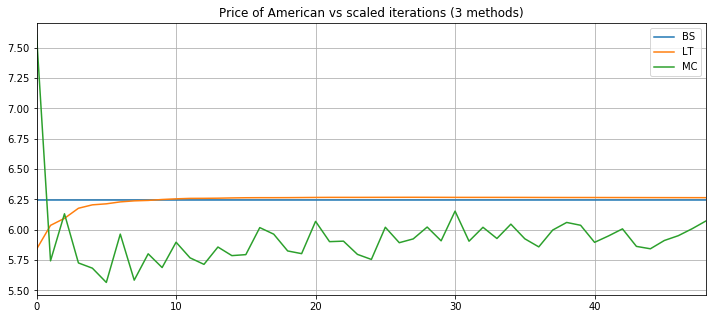

In [283]:
I = range(1, 50)
dBS = [o.pxBS() for i in I]
dLT = [o.pxLT(nsteps=2*i) for i in I]
dMC = [o.pxMC(nsteps=1000, npaths=100*i, rng_seed=0, deg=5) for i in I]
from pandas import DataFrame
d = DataFrame({'BS': dBS, 'LT': dLT, 'MC': dMC});  d   # doctest: +ELLIPSIS
d.plot(grid=1, title='Price of American vs scaled iterations (3 methods)',figsize=(12,5))

In [7]:
from qfrm.American import *
import numpy as np

In [269]:
s = Stock(S0=42, vol=.4)

In [270]:
o = American(ref=s, right='put', K=40, T=2, rf_r=0.06)

In [271]:
o_european=European(ref=s,right='put', K=40, T=2, rf_r=0.06)

In [272]:
(o.pxBS(), o.pxLT(nsteps=1000), o.pxMC(nsteps=100, npaths=100000, rng_seed=1, deg=5))

(6.246, 6.252, 6.094444726)

In [273]:
(o_european.pxBS(), o_european.pxLT(nsteps=1000), o_european.pxMC(nsteps=100, npaths=100000, rng_seed=1, deg=5))

(5.736, 5.737, 5.744941682)

In [17]:
LSMC(42,40,-1,0.06,0.4,2,1,5,100,100000)

6.094444725596879

In [19]:
rng_seed=1
r=0.06
vol=0.2
dt=1/10
n=10
m=3
S0=36

In [18]:
np.random.seed(rng_seed)
norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n + 1, m))
S = S0 * np.exp(np.cumsum(norm_mtx, axis=0))
S[0] = S0

In [19]:
norm_mtx

array([[ 0.10673262, -0.03469087, -0.02940451],
       [-0.06386049,  0.05873318, -0.14156209],
       [ 0.11435159, -0.04414295,  0.0241778 ],
       [-0.01177157,  0.09647183, -0.12629474],
       [-0.01639145, -0.02028973,  0.07570588],
       [-0.06556323, -0.00690532, -0.05152064],
       [ 0.00666983,  0.04086047, -0.06560927],
       [ 0.07639868,  0.0610216 ,  0.03578053],
       [ 0.06097513, -0.03924275, -0.00377226],
       [-0.05518326, -0.01294273,  0.03754262],
       [-0.03974447, -0.0210929 , -0.03946062]])

In [20]:
S

array([[36.        , 36.        , 36.        ],
       [37.57695883, 36.87601169, 30.34258999],
       [42.12926588, 35.28360112, 31.08514772],
       [41.63624589, 38.85707316, 27.39705158],
       [40.95933024, 38.07661802, 29.55170014],
       [38.36004401, 37.81459262, 28.0677333 ],
       [38.61675421, 39.39171625, 26.28533993],
       [41.68264743, 41.87031698, 27.24287173],
       [44.30333898, 40.25903312, 27.14029812],
       [41.9247687 , 39.74132881, 28.17858419],
       [40.29116942, 38.91184792, 27.08829311]])

In [33]:
S=np.genfromtxt('../A Simple Example.txt',delimiter='\t')

In [34]:
S

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.09, 1.16, 1.22, 0.93, 1.11, 0.76, 0.92, 0.88],
       [1.08, 1.26, 1.07, 0.97, 1.56, 0.77, 0.84, 1.22],
       [1.34, 1.54, 1.03, 0.92, 1.52, 0.9 , 1.01, 1.34]])

In [379]:
S0,K,signCP,rf_r,vol,T,rng_seed,deg,nsteps,npaths=42,40,-1,0.06,0.4,2,1,5,100,100000

In [380]:
rng_seed, deg, n, m = rng_seed, deg, nsteps, npaths

dt = T/n
df=np.exp(-rf_r*dt)

S0, vol = S0, vol
K, r, signCP = K, rf_r, signCP

np.random.seed(rng_seed)
norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n , m))
S=np.ones(shape=(n+1,m))*S0
S[1:,:]=S0 * np.exp(np.cumsum(norm_mtx, axis=0))


payout = np.maximum(signCP * (S - K), 0)
v = np.copy(payout)  # terminal payouts
X=np.where(S<K,S,np.nan)



In [381]:
X

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan, 30.879,    nan, ..., 14.656, 23.135,    nan],
       [   nan, 31.262,    nan, ..., 14.529, 20.813,    nan],
       [   nan, 31.021,    nan, ..., 14.396, 19.99 ,    nan]])

In [21]:
signCP=-1
K=1.2
n=5
df=np.exp(-0.06*1)
deg=3
rng_seed=2
r=0.6
vol=0.2
dt=1/10
m=8
S0=1

In [22]:
np.random.seed(rng_seed)
norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n, m))
S=np.ones(shape=(n+1,m))*S0
S[1:,:]=S0 * np.exp(np.cumsum(norm_mtx, axis=0))

In [23]:
norm_mtx

array([[ 0.032,  0.054, -0.077,  0.162, -0.055,  0.005,  0.09 , -0.021],
       [-0.009,  0.001,  0.093,  0.203,  0.061, -0.013,  0.092,  0.02 ],
       [ 0.057,  0.132,  0.011,  0.059,  0.002,  0.048,  0.074, -0.005],
       [ 0.037,  0.043,  0.018, -0.017, -0.032,  0.048,  0.041,  0.199],
       [-0.096,  0.065,  0.081,  0.144,  0.09 ,  0.005,  0.058,  0.092]])

In [24]:
S

array([[1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [1.032, 1.056, 0.926, 1.176, 0.946, 1.005, 1.094, 0.979],
       [1.023, 1.056, 1.016, 1.44 , 1.005, 0.992, 1.199, 1.   ],
       [1.083, 1.206, 1.027, 1.527, 1.008, 1.041, 1.292, 0.995],
       [1.123, 1.259, 1.045, 1.501, 0.976, 1.092, 1.346, 1.214],
       [1.02 , 1.344, 1.134, 1.734, 1.068, 1.098, 1.426, 1.332]])

In [25]:
np.cumsum(norm_mtx, axis=0)

array([[ 3.164e-02,  5.444e-02, -7.710e-02,  1.617e-01, -5.543e-02,
         4.763e-03,  8.981e-02, -2.076e-02],
       [ 2.273e-02,  5.495e-02,  1.577e-02,  3.647e-01,  5.200e-03,
        -7.941e-03,  1.819e-01, -4.634e-04],
       [ 7.952e-02,  1.873e-01,  2.647e-02,  4.233e-01,  7.664e-03,
         4.017e-02,  2.561e-01, -4.999e-03],
       [ 1.161e-01,  2.303e-01,  4.414e-02,  4.062e-01, -2.422e-02,
         8.846e-02,  2.971e-01,  1.941e-01],
       [ 2.010e-02,  2.955e-01,  1.256e-01,  5.502e-01,  6.552e-02,
         9.306e-02,  3.551e-01,  2.864e-01]])

In [26]:
X=np.where(S<K,S,np.nan)

In [27]:
X

array([[1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ],
       [1.032, 1.056, 0.926, 1.176, 0.946, 1.005, 1.094, 0.979],
       [1.023, 1.056, 1.016,   nan, 1.005, 0.992, 1.199, 1.   ],
       [1.083,   nan, 1.027,   nan, 1.008, 1.041,   nan, 0.995],
       [1.123,   nan, 1.045,   nan, 0.976, 1.092,   nan,   nan],
       [1.02 ,   nan, 1.134,   nan, 1.068, 1.098,   nan,   nan]])

In [29]:
payout = np.maximum(signCP * (S - K), 0)
v = np.copy(payout)  # terminal payouts
v

array([[0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.168, 0.144, 0.274, 0.024, 0.254, 0.195, 0.106, 0.221],
       [0.177, 0.144, 0.184, 0.   , 0.195, 0.208, 0.001, 0.2  ],
       [0.117, 0.   , 0.173, 0.   , 0.192, 0.159, 0.   , 0.205],
       [0.077, 0.   , 0.155, 0.   , 0.224, 0.108, 0.   , 0.   ],
       [0.18 , 0.   , 0.066, 0.   , 0.132, 0.102, 0.   , 0.   ]])

In [11]:
def P_V(X,y,train_size,rng_seed):
    X_train, _, y_train, _=train_test_split(X,y,train_size=train_size, random_state=rng_seed)
    rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
    gpr = GaussianProcessRegressor(kernel=rbf)
    gpr.fit(X_train, y_train)
    C = gpr.predict(X)
    return C

In [49]:
i=4
idx = np.isfinite(X[i])
X_train, _, y_train, _=train_test_split(X[i][idx],(v[i + 1] * df)[idx],train_size=0.8, random_state=rng_seed)
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf)
gpr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
C = gpr.predict((X[i][idx]).reshape(-1,1))
C2=np.zeros_like(X[i])
C2[idx]=np.squeeze(C)
C2[~idx]=X[i][~idx]
C2=np.where(np.isnan(C2),0,C2)
v[i] = np.where(payout[i] > C2, payout[i], v[i + 1] * df)  # exercise decision


In [55]:
X[i]

array([1.123,   nan, 1.045,   nan, 0.976, 1.092,   nan,   nan])

In [54]:
idx

array([ True, False,  True, False,  True,  True, False, False])

In [53]:
X[i][idx]

array([1.123, 1.045, 0.976, 1.092])

In [57]:
(v[i + 1] * df)[idx]

array([0.169, 0.062, 0.125, 0.096])

In [56]:
C

array([[0.169],
       [0.062],
       [0.   ],
       [0.096]])

In [59]:
(v[i + 1] * df)

array([0.169, 0.   , 0.062, 0.   , 0.125, 0.096, 0.   , 0.   ])

In [58]:
C2

array([0.169, 0.   , 0.062, 0.   , 0.   , 0.096, 0.   , 0.   ])

In [370]:
i=4
idx = np.isfinite(X[i])
X_train, _, y_train, _=train_test_split(X[i][idx],(v[i + 1] * df)[idx],train_size=0.4, random_state=rng_seed)
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf)
gpr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
C = gpr.predict((X[i][idx]).reshape(-1,1))
print(np.squeeze(C).shape,idx.shape)
C2[idx]=np.squeeze(C)
C2[~idx]=X[i][~idx]
C=np.where(np.isnan(C2),0,C2)
v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)

(4,) (8,)


In [352]:
C2

array([0.169,   nan, 0.169,   nan, 0.167, 0.169,   nan,   nan])

In [345]:
(X[idx]).shape

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 8

In [329]:
i=4
idx = np.isfinite(X[i])
X_train, _, y_train, _=train_test_split(X,y,train_size=train_size, random_state=rng_seed)
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf)
gpr.fit(X_train, y_train)
C = gpr.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[1.123 1.045 0.976 1.092].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
C=np.squeeze(P_V_idx(X[i],v[i + 1] * df,0.4,rng_seed,idx))
C=np.where(np.isnan(C),0,C)
v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
C

In [265]:
i=4
rg = np.polyfit(S[i], v[i + 1] * df, deg)      # fit 5th degree polynomial to PV of current inner values
C = np.polyval(rg, S[i])   
C

array([ 0.089,  0.016,  0.114,  0.003,  0.111,  0.101, -0.021,  0.04 ])

In [260]:
v[i + 1][idx] * df,C

(array([0.169, 0.062, 0.125, 0.096]),
 array([0.169,   nan, 0.062,   nan, 0.125, 0.096,   nan,   nan]))

In [218]:
C1=P_V((S[4]).reshape(-1,1),(v[4 + 1] * df).reshape(-1,1),0.6,rng_seed)

In [219]:
C1

array([[ 1.317e-10],
       [ 1.116e-01],
       [ 1.633e-01],
       [-6.861e-03],
       [ 1.237e-02],
       [-1.445e-11]])

In [69]:
idx = np.isfinite(X[i])
rg = np.polyfit(X[i][idx], v[i + 1][idx] * df,deg)      # fit 5th degree polynomial to PV of current inner values
C3= np.polyval(rg, X[i]) 
C3=np.where(np.isnan(C3),0,C3)
C3

array([0.169, 0.   , 0.062, 0.   , 0.125, 0.096, 0.   , 0.   ])

In [68]:
X[i]

array([1.123,   nan, 1.045,   nan, 0.976, 1.092,   nan,   nan])

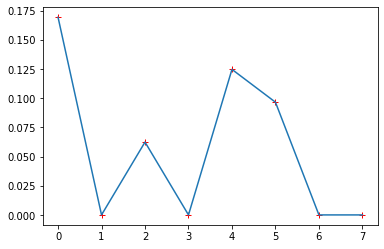

In [79]:
plt.plot(v[i + 1] * df,'r+')
#plt.plot(C2)
plt.plot(np.squeeze(C3))

In [93]:
payout = np.maximum(signCP * (S - K), 0)
v = np.copy(payout)  # terminal payouts


# Least-Squares Monte Carlo (LSM):
for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction

    C=np.squeeze(P_V((S[i]).reshape(-1,1),(v[i + 1] * df).reshape(-1,1),0.4,rng_seed))
    v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
    print(i,C,v[i+1])
v[0] = v[1] * df
#print(np.round(v,2))
v0 = np.mean(v[0])

2 [0.         0.         0.         0.         0.         0.
 0.         0.         0.12209749 0.        ] [0.         0.         0.04055073 0.         0.02401423 0.02950497
 0.         0.00095297 0.12964758 0.        ]
1 [0.         0.         0.         0.         0.         0.
 0.         0.         0.11498709 0.03686045] [0.         0.         0.11634271 0.         0.06265329 0.07462462
 0.         0.00089747 0.12209749 0.03913977]


In [94]:
v0

0.08252820725849766

Least-Squares Monte Carlo

In [12]:
def LSMC(S0,K,signCP,rf_r,vol,T,rng_seed,deg,nsteps,npaths):
    rng_seed, deg, n, m = rng_seed, deg, nsteps, npaths

    dt = T/n
    df=np.exp(-rf_r*dt)

    S0, vol = S0, vol
    K, r, signCP = K, rf_r, signCP

    np.random.seed(rng_seed)
    norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n , m))
    S=np.ones(shape=(n+1,m))*S0
    S[1:,:]=S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    #norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n + 1, m))
    #S = S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    #S[0] = S0

    payout = np.maximum(signCP * (S - K), 0)
    v = np.copy(payout)  # terminal payouts


    # Least-Squares Monte Carlo (LSM):
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        rg = np.polyfit(S[i], v[i + 1] * df, deg)      # fit 5th degree polynomial to PV of current inner values
        C = np.polyval(rg, S[i])              # continuation values.
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
    v[0] = v[1] * df
    return np.mean(v[0])

In [8]:
def LSMC_inmoney(S0,K,signCP,rf_r,vol,T,rng_seed,deg,nsteps,npaths):
    rng_seed, deg, n, m = rng_seed, deg, nsteps, npaths

    dt = T/n
    df=np.exp(-rf_r*dt)

    S0, vol = S0, vol
    K, r, signCP = K, rf_r, signCP

    np.random.seed(rng_seed)
    norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n , m))
    S=np.ones(shape=(n+1,m))*S0
    S[1:,:]=S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    #norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n + 1, m))
    #S = S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    #S[0] = S0

    payout = np.maximum(signCP * (S - K), 0)
    v = np.copy(payout)  # terminal payouts
    X=np.where(S<K,S,np.nan)

    # Least-Squares Monte Carlo (LSM):
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        idx = np.isfinite(X[i])
        rg = np.polyfit(X[i][idx], v[i + 1][idx] * df,deg)      # fit 5th degree polynomial to PV of current inner values
        C = np.polyval(rg, X[i]) 
        C=np.where(np.isnan(C),0,C)
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
    v[0] = v[1] * df
    return np.mean(v[0])

In [83]:
def LSMC_GPR(S0,K,signCP,rf_r,vol,T,rng_seed,deg,nsteps,npaths):
    rng_seed, deg, n, m = rng_seed, deg, nsteps, npaths

    dt = T/n
    df=np.exp(-rf_r*dt)

    S0, vol = S0, vol
    K, r, signCP = K, rf_r, signCP

    np.random.seed(rng_seed)
    norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n , m))
    S=np.ones(shape=(n+1,m))*S0
    S[1:,:]=S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    

    payout = np.maximum(signCP * (S - K), 0)
    v = np.copy(payout)  # terminal payouts
    X=np.where(S<K,S,np.nan)

    # Least-Squares Monte Carlo (LSM):
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        idx = np.isfinite(X[i])
        X_train, _, y_train, _=train_test_split(X[i][idx],(v[i + 1] * df)[idx],train_size=0.9, random_state=rng_seed)
        rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
        gpr = GaussianProcessRegressor(kernel=rbf)
        gpr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
        C = gpr.predict((X[i][idx]).reshape(-1,1))
        C2=np.zeros_like(X[i])
        C2[idx]=np.squeeze(C)
        C2[~idx]=X[i][~idx]
        C2=np.where(np.isnan(C2),0,C2)
        v[i] = np.where(payout[i] > C2, payout[i], v[i + 1] * df)  # exercise decision
        if i%10==0:print(i)
    v[0] = v[1] * df
    return np.mean(v[0])

In [84]:
def e_LSMC(S0,K,signCP,rf_r,vol,T,rng_seed,deg,nsteps,npaths):
    rng_seed, deg, n, m = rng_seed, deg, nsteps, npaths

    dt = T/n
    df=np.exp(-rf_r*dt)

    S0, vol = S0, vol
    K, r, signCP = K, rf_r, signCP

    np.random.seed(rng_seed)
    norm_mtx = np.random.normal((r - 0.5 * vol ** 2) * dt, vol * math.sqrt(dt), (n + 1, m))
    S = S0 * np.exp(np.cumsum(norm_mtx, axis=0))
    S[0] = S0
    
    payout = np.maximum(signCP * (S - K), 0)
    v = np.copy(payout)  # terminal payouts


    # Least-Squares Monte Carlo (LSM):
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        rg = np.polyfit(S[i], v[i + 1] * df, deg)      # fit 5th degree polynomial to PV of current inner values
        C = np.polyval(rg, S[i])              # continuation values.
        v[i] = np.where(payout[i] > C, v[i + 1] * df, v[i + 1] * df)  # exercise decision
    v[0] = v[1] * df

    return np.mean(v[0])

In [86]:
LSMC_GPR(42,40,-1,0.06,0.4,2,1,5,100,6000)

90
80
70
60
50
40
30
20
10


4.723538209782451

In [16]:
LSMC(42,40,-1,0.06,0.4,2,1,5,100,100000)

6.094444725596879

In [17]:
LSMC_inmoney(42,40,-1,0.06,0.4,2,1,5,100,100000)

6.2570112241936044

In [17]:
e_LSMC(44,40,-1,0.06,0.4,2,1,5,500,100000)

5.223058717037572

4. Valuing a Heston Model

In [44]:
from sklearn import linear_model

https://www.quantstart.com/articles/Heston-Stochastic-Volatility-Model-with-Euler-Discretisation-in-C

In [97]:
def HeMC (S0, mu, v0, rho, kappa, theta, xi, T, n):

    # Generate a Monte Carlo simulation for the Heston model, Euler–Maruyama method

    # Generate random Brownian Motion
    dt=T/n
    MU  = np.array([0, 0])
    COV = np.matrix([[1, rho], [rho, 1]])
    W_s   = np.random.normal(loc=0.0, scale=1.0, size=n)
    W_t   = np.random.normal(loc=0.0, scale=1.0, size=n)

    # Generate paths
    vt    = np.zeros(n+1)
    vt[0] = v0
    St    = np.zeros(n+1)
    St[0] = S0
    for t in range(1,n+1):
        vt[t] = vt[t-1] + kappa*(theta-np.max(vt[t-1],0))*dt + \
        xi*np.sqrt(np.max(vt[t-1],0)*dt)*(rho*W_s[t-1]+np.sqrt(1-rho**2)*W_t[t-1])
        St[t] = St[t-1]*np.exp((mu - 0.5*np.max(vt[t-1],0))*dt + \
        np.sqrt(np.max(vt[t-1],0)*dt)*W_s[t-1])

    return St, vt

In [145]:
def LSMC_Heston(S0,K,signCP,rf_r,T,rng_seed,nsteps,npaths,v0,rho,kappa,theta,xi):
    rng_seed, n, m = rng_seed, nsteps, npaths
    S0 = S0
    K, r, signCP = K, rf_r, signCP
      
    dt = T/n
    df=np.exp(-r*dt)

    np.random.seed(rng_seed)
    St=np.zeros(shape=(n+1,m))
    vt=np.zeros(shape=(n+1,m))
    for j in range(m):
        St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
        St[:,j]=St_1
        vt[:,j]=vt_1

    payout = np.maximum(signCP * (St - K), 0)
    v = np.copy(payout)  # terminal payouts
    data=np.concatenate(([St],[St**2],[St**3],[vt],[vt**2],[vt**3],\
                 [np.ones_like(St)],[St*vt],[St**2*vt],[St*vt**2]),axis=0) # (10,n+1,m)
        

    # Least-Squares Monte Carlo (LSM):
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        C = lm_V(data[:,i,:].T,v[i+1] * df)
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
    v[0] = v[1] * df

    return np.mean(v[0]),np.std(v[0],ddof=1)

In [110]:
T     = 0.25
n     = 100
S0    = 100 # Initial price
K     = 100
rf_r    = 0.05 # Expected return = risk free return
rho   = -0.7 # Correlation
kappa = 3 # Revert rate
theta = 0.04 # Long-term volatility
xi    = 0.1 # Volatility of instantaneous volatility
v0    = 0.09 # Initial instantaneous volatility
signCP=-1
rng_seed=2
m=5000
m0=2000 # a random learning subset of paths

In [144]:
LSMC_Heston(S0,K,signCP,rf_r,T,rng_seed,n,m,v0,rho,kappa,theta,xi)

(5.068880177760309, 7.3429324950205155)

In [146]:
LSMC_Heston(S0,K,signCP,rf_r,T,rng_seed,n,m,v0,rho,kappa,theta,xi)

(4.915277117187904, 5.743063361223835)

In [142]:
GPR_Heston_inmoney(S0,K,signCP,rf_r,T,rng_seed,n,m,v0,rho,kappa,theta,xi)

90 5.146963319132726
80 4.972808320674713
70 4.748588810935014
60 4.608956351714146
50 4.329045231034458
40 3.9673771070797637
30 3.6380194836666293
20 3.1104518523841196
10 2.481412286595274


(0.0, 0.0)

In [152]:
dt = T/n
df=np.exp(-r*dt)
df

0.9998750078121745

In [115]:
rng_seed, n, m = rng_seed, n, m
S0 = S0
K, r, signCP = K, rf_r, signCP

dt = T/n
df=np.exp(-r*dt)

np.random.seed(rng_seed)
St=np.zeros(shape=(n+1,m))
vt=np.zeros(shape=(n+1,m))
for j in range(m):
    St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
    St[:,j]=St_1
    vt[:,j]=vt_1

payout = np.maximum(signCP * (St - K), 0)
v = np.copy(payout)  # terminal payouts
#data=np.concatenate(([St],[St**2],[St**3],[vt],[vt**2],[vt**3],\
 #            [np.ones_like(St)],[St*vt],[St**2*vt],[St*vt**2]),axis=0) # (10,n+1,m)
data=np.concatenate(([St],[vt],[St*vt]),axis=0) # (3,n+1,m)
X=np.where(St<K,St,np.nan)



In [125]:
X[i]

array([89.04 , 76.346, 80.577, ...,    nan,    nan, 92.911])

In [135]:
i=99         # American Option Valuation by Backwards Induction

idx = np.isfinite(X[i])
C=P_V_inmoney(data[:,i,:].T,v[i+1] * df,0.4,rng_seed,idx)
v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
if(i%10==0):print(i)

/Users/lijinyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [131]:
idx[:30]

array([ True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True])

In [136]:
C[:30]

array([ 0.   , 24.123,  0.   ,  0.   ,    nan,    nan,    nan,  0.   ,
        1.397,    nan,    nan,  0.   ,  0.   ,    nan,  0.   ,  6.444,
        6.14 , 14.828, 19.233,    nan,  2.345,    nan,    nan,  0.   ,
        0.   ,    nan,  7.687,  0.   ,  0.   , 15.499])

In [154]:
df=0.9

In [202]:
a[:,-1,:].T.shape

(5000, 10)

In [175]:
lm = linear_model.LinearRegression()
model = lm.fit(a[:,-1,:].T,v[100] * df)
predictions=model.predict(a[:,-1,:].T)

In [176]:
predictions[0:5]

array([ 3.37479143,  6.93426762,  3.05036105, 12.42736012,  0.64613574])

In [192]:
(10.1653-10.1229)/10.1229

0.0041885230516947375

In [138]:
def P_V_inmoney(X,y,train_size,rng_seed,idx):
    X_train, _, y_train, _=train_test_split(X[idx],y[idx],train_size=train_size, random_state=rng_seed)
    rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
    gpr = GaussianProcessRegressor(kernel=rbf)
    gpr.fit(X_train, y_train)
    C = gpr.predict((X[idx]))
    C2=np.zeros_like(y)
    C2[idx]=C
    C2[~idx]=np.nan
    C2=np.where(np.isnan(C2),0,C2)
    return C2

In [141]:
def GPR_Heston_inmoney(S0,K,signCP,rf_r,T,rng_seed,nsteps,npaths,v0,rho,kappa,theta,xi):
    rng_seed, n, m = rng_seed, nsteps, npaths
    S0 = S0
    K, r, signCP = K, rf_r, signCP
      
    dt = T/n
    df=np.exp(-r*dt)

    np.random.seed(rng_seed)
    St=np.zeros(shape=(n+1,m))
    vt=np.zeros(shape=(n+1,m))
    for j in range(m):
        St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
        St[:,j]=St_1
        vt[:,j]=vt_1

    payout = np.maximum(signCP * (St - K), 0)
    v = np.copy(payout)  # terminal payouts
    #data=np.concatenate(([St],[St**2],[St**3],[vt],[vt**2],[vt**3],\
     #            [np.ones_like(St)],[St*vt],[St**2*vt],[St*vt**2]),axis=0) # (10,n+1,m)
    data=np.concatenate(([St],[vt],[St*vt]),axis=0) # (3,n+1,m)
    X=np.where(St<K,St,np.nan)


    # GPR:
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        
        idx = np.isfinite(X[i])
        C=P_V_inmoney(data[:,i,:].T,v[i+1] * df,0.4,rng_seed,idx)
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
        if(i%10==0):print(i,np.mean(v[i]))
    v[0] = v[1] * df
    return np.mean(v[0]),np.std(v[0],ddof=1)

In [148]:
def GPR_Heston(S0,K,signCP,rf_r,T,rng_seed,nsteps,npaths,v0,rho,kappa,theta,xi):
    rng_seed, n, m = rng_seed, nsteps, npaths
    S0 = S0
    K, r, signCP = K, rf_r, signCP
      
    dt = T/n
    df=np.exp(-r*dt)

    np.random.seed(rng_seed)
    St=np.zeros(shape=(n+1,m))
    vt=np.zeros(shape=(n+1,m))
    for j in range(m):
        St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
        St[:,j]=St_1
        vt[:,j]=vt_1

    payout = np.maximum(signCP * (St - K), 0)
    v = np.copy(payout)  # terminal payouts
    #data=np.concatenate(([St],[St**2],[St**3],[vt],[vt**2],[vt**3],\
     #            [np.ones_like(St)],[St*vt],[St**2*vt],[St*vt**2]),axis=0) # (10,n+1,m)
    data=np.concatenate(([St],[vt],[St*vt]),axis=0) # (2,n+1,m)

    # GPR:
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        C=P_V(data[:,i,:].T,v[i+1] * df,0.4,rng_seed)
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
        if(i%10==0):print(i,np.mean(v[i]))
            
    v[0] = v[1] * df

    return np.mean(v[0]),np.std(v[0],ddof=1)

In [95]:
def lm_V(X,y):
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    C1 = model.predict(X)
    return C1

In [434]:
data.shape

(10, 101, 5000)

In [435]:
model = lm.fit(data[:,99,:].T,v[100] * df)
C1 = model.predict(data[:,i,:].T)

In [426]:
(v[100] * df)[:20]

array([ 0.        ,  0.        ,  0.        , 13.75630497,  0.        ,
        0.        ,  0.        ,  0.        ,  8.53714452,  0.        ,
       14.72906238,  0.        ,  0.        ,  0.        ,  8.04858414,
        0.        , 16.23569403, 13.2625111 ,  0.        ,  4.98869107])

In [436]:
C1[:20]

array([3.07770955, 4.69703864, 4.89067165, 4.82221367, 3.58059951,
       4.25492594, 4.66643473, 4.20161192, 3.82389079, 5.19224728,
       3.90205533, 4.15641268, 4.48595148, 3.94285782, 4.165417  ,
       4.06706745, 4.57596793, 5.35513898, 4.3079938 , 4.01181146])

In [438]:
ll=P_V(data[:,99,:].T,v[100] * df,0.4,1)[:20]

In [440]:
np.round(ll,1)

array([ 0. ,  0.2,  0. ,  4.7,  0. , -0. ,  0. ,  0. ,  3.3,  0. ,  7.6,
        0. ,  0. ,  0. ,  4.5,  0. ,  9.5, -0.1,  0. ,  0.4])

In [403]:
(v[100] * df)[:20]

array([ 0.        ,  0.        ,  0.        , 13.75630497,  0.        ,
        0.        ,  0.        ,  0.        ,  8.53714452,  0.        ,
       14.72906238,  0.        ,  0.        ,  0.        ,  8.04858414,
        0.        , 16.23569403, 13.2625111 ,  0.        ,  4.98869107])

In [395]:
St.shape,vt.shape,v.shape,payout.shape

((101, 5000), (101, 5000), (101, 5000), (101, 5000))

In [396]:
a.shape

(10, 101, 5000)

In [45]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf)

In [397]:
X_train, _, y_train, _=train_test_split(a[:,99,:].T,v[100] * df,train_size=0.4, random_state=42)

In [249]:
# Reuse training data from previous 1D example
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [234]:
# Compute posterior predictive mean and covariance
mu_s = gpr.predict(a[:,-2,:].T)

In [245]:
np.mean((v[100] * df))

8.673181427533068

In [236]:
mu_s[:10]

array([ 0.        ,  7.16327088,  2.47043764, 12.7286817 ,  0.        ,
        5.49950996,  0.        ,  0.        ,  0.        ,  6.44508578])

In [470]:
GPR_Heston(S0,K,signCP,rf_r,T,rng_seed,n,m,v0,rho,kappa,theta,xi)

90


KeyboardInterrupt: 

In [92]:
S0,K,signCP,rf_r,T,rng_seed,n,m,v0,rho,kappa,theta,xi

NameError: name 'rf_r' is not defined

In [279]:
l=np.array([1,2,3])

In [282]:
l**2-1

array([0, 3, 8])

In [460]:
def GPR_Heston_CV(S0,K,signCP,rf_r,T,rng_seed,nsteps,npaths,v0,rho,kappa,theta,xi):
    rng_seed, n, m = rng_seed, nsteps, npaths
    S0 = S0
    K, r, signCP = K, rf_r, signCP
    train_size=0.4
    dt = T/n
    df=np.exp(-r*dt)

    np.random.seed(rng_seed)
    St=np.zeros(shape=(n+1,m))
    vt=np.zeros(shape=(n+1,m))
    for j in range(m):
        St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
        St[:,j]=St_1
        vt[:,j]=vt_1

    payout = np.maximum(signCP * (St - K), 0)
    v = np.copy(payout)  # terminal payouts (n+1,m)
    #data=np.concatenate(([St],[vt]),axis=0) # (2,n+1,m)
    data=np.concatenate(([St],[St**2],[St**3],[vt],[vt**2],[vt**3],\
                 [np.ones_like(St)],[St*vt],[St**2*vt],[St*vt**2]),axis=0) # (10,n+1,m)
    Y= np.copy(payout) # (n+1,m)

    # GPR:
    for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
        X=data[:,i,:].T
        v_discounted=v[i+1] * df
        y_discounted=Y[i+1] * df
        C_V=P_V(X,v_discounted,train_size,rng_seed)
        C_VY=P_V(X,v_discounted*y_discounted,train_size,rng_seed)
        C_Y=P_V(X,y_discounted,train_size,rng_seed)
        C_Y_square=P_V(X,y_discounted**2,train_size,rng_seed)
        v_star=np.divide(C_VY-C_V*C_Y,C_Y_square-C_Y**2,where=((C_Y_square-C_Y**2)!=0))
        Expectation=cal_BS(St[i],vt[i],K,dt*(n-i),rf_r)
        C=C_V-v_star*(C_Y-Expectation)
        v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
        Y[i] = np.where(payout[i] > C, Expectation, Y[i + 1] * df)
        print(i)
    v[0] = v[1] * df

    return np.mean(v[0]),np.std(v[0],ddof=1)

In [303]:
def cal_BS(S,v,K,T,rf_r):
    a=np.zeros_like(S)
    for i in range(len(S)):
        s=Stock(S0=S[i],vol=v[i])
        o_e=European(ref=s,right='put', K=K, T=T, rf_r=rf_r)
        a[i]=o_e.pxBS()
    return a

In [336]:
j=v[100] * df
i=v[100] * df

In [335]:
(j*j).shape

(5000,)

In [338]:
P_V(a[:,-2,:].T,i**2,0.4,1).shape

(5000,)

In [304]:
cal_BS(St[99],vt[99],100,T/n,0.05)

array([ 3.918892  ,  8.45332632,  2.70876604, ...,  6.77053788,
        0.        , 11.24015613])

In [312]:
St[99][0],vt[99][0]

(96.05611112366998, 0.04494552597244783)

In [316]:
s=Stock(St[99][0],vt[99][0])
o_a=European(ref=s,right='put', K=100, T=0.5/100, rf_r=0.05)

In [317]:
o_a.pxBS()

3.918892001

In [318]:
o_a.pxBS()

3.918892001

In [430]:
rng_seed, n, m = 1, 100, 5000
S0 = 100
K, r, signCP = 100, 0.05, -1
train_size=0.8
dt = 0.5/n
df=np.exp(-r*dt)

np.random.seed(rng_seed)
St=np.zeros(shape=(n+1,m))
vt=np.zeros(shape=(n+1,m))
for j in range(m):
    St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
    St[:,j]=St_1
    vt[:,j]=vt_1

payout = np.maximum(signCP * (St - K), 0)
v = np.copy(payout)  # terminal payouts (n+1,m)
data=np.concatenate(([St],[vt]),axis=0) # (2,n+1,m)
Y= np.copy(payout) # (n+1,m)

In [419]:
rng_seed, n, m = 1, 100, 5000
S0 = 100
K, r, signCP = 100, 0.05, -1
train_size=0.4
dt = 0.5/n
df=np.exp(-r*dt)

np.random.seed(rng_seed)
St=np.zeros(shape=(n+1,m))
vt=np.zeros(shape=(n+1,m))
for j in range(m):
    St_1,vt_1= HeMC(S0, r, v0, rho, kappa, theta, xi, T, n)
    St[:,j]=St_1
    vt[:,j]=vt_1

payout = np.maximum(signCP * (St - K), 0)
v = np.copy(payout)  # terminal payouts (n+1,m)
data=np.concatenate(([St],[vt]),axis=0) # (2,n+1,m)
Y= np.copy(payout) # (n+1,m)

# GPR:
for i in range(n - 1, 0, -1):          # American Option Valuation by Backwards Induction
    X=data[:,i,:].T
    v_discounted=v[i+1] * df
    y_discounted=Y[i+1] * df
    C_V=P_V(X,v_discounted,train_size,rng_seed)
    C_VY=P_V(X,v_discounted*y_discounted,train_size,rng_seed)
    C_Y=P_V(X,y_discounted,train_size,rng_seed)
    C_Y_square=P_V(X,y_discounted**2,train_size,rng_seed)
    v_star=np.divide(C_VY-C_V*C_Y,C_Y_square-C_Y**2,where=((C_Y_square-C_Y**2)!=0))
    Expectation=cal_BS(St[i],vt[i],K,dt*(n-i),rf_r)
    C=C_V-v_star*(C_Y-Expectation)
    v[i] = np.where(payout[i] > C, payout[i], v[i + 1] * df)  # exercise decision
    Y[i] = np.where(payout[i] > C, Expectation, Y[i + 1] * df)
    print(i)
v[0] = v[1] * df

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [422]:
v[0]

array([8.29359746, 1.14199508, 9.29174955, ..., 3.42096142, 5.19153998,
       6.2559774 ])

In [421]:
np.mean(v[0])

4.693945064633235

In [416]:
(v_star*(C_Y-Expectation))[:20]

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.08555462,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.84962063,
        0.        ,  0.95525491, -0.        ,  0.        , -0.        ])

In [418]:
(C_Y-Expectation)[:20]

array([ 0.00000000e+00, -7.12436800e-03,  0.00000000e+00, -1.30493957e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.08555462e+00,  0.00000000e+00, -1.43889198e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.49620627e-01,  0.00000000e+00,
        9.55254908e-01, -1.38934217e+01,  0.00000000e+00, -5.46360490e+00])

In [408]:
(C_Y**2)[:20]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 216.94527853,   0.        ,
         0.        ,   0.        ,  64.77970658,   0.        ,
       263.59776067,   0.        ,   0.        ,  24.88703856])

In [388]:
C_Y_square[:20]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 216.94527853,   0.        ,
         0.        ,   0.        ,  64.77970658,   0.        ,
       263.59776067,   0.        ,   0.        ,  24.88703856])

In [362]:
St[99][:20]

array([110.4968044 , 100.72150108, 117.51676607,  86.92560741,
       135.84655992, 102.70526093, 161.44533534, 156.77532512,
        90.35230399, 106.05435066,  85.58608337, 118.58814667,
       118.03065637, 123.58583577,  92.77603962, 195.99535475,
        84.694564  ,  86.08158146, 114.39887854,  94.51139823])

In [363]:
C_Y[:20]

array([8.17076487e+00, 8.17076487e+00, 8.17076487e+00, 8.17076487e+00,
       6.18349816e-12, 8.17076487e+00, 8.17076487e+00, 6.18349816e-12,
       8.17076487e+00, 8.17076487e+00, 8.17076487e+00, 8.17076487e+00,
       8.17076487e+00, 8.17076487e+00, 8.04858414e+00, 6.18349816e-12,
       8.17076487e+00, 8.17076487e+00, 6.18349816e-12, 8.17076487e+00])

In [356]:
np.round(Expectation[:20],3)

array([0.0000e+00, 7.0000e-03, 0.0000e+00, 1.3049e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 9.6230e+00, 0.0000e+00,
       1.4389e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.1990e+00,
       0.0000e+00, 1.5280e+01, 1.3893e+01, 0.0000e+00, 5.4640e+00])

In [366]:
v_star[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [409]:
s1=np.array([1,2,3])
s2=np.array([1,0,2])

In [411]:
np.divide(s1,s2,where=(s2!=0))

array([1. , 0. , 1.5])

In [412]:
v_star=np.divide(C_VY-C_V*C_Y,C_Y_square-C_Y**2,where=((C_Y_square-C_Y**2)!=0))

ValueError: operands could not be broadcast together with shapes (5000,) (2000,) 